<center> <h1> Time Series - Part II </h1> </center>

<center> <h1> Model Based Approaches </h1> </center>

## What are we going to learn today ?
***
- Model Driven Methods
- Models we can use in Time Series
- Assumptions
- Feature Engineering
- Trend
- Seasonal Dummy Variables
	- Weekly
	- Monthly
	- Quarterly & Yearly
	- Hourly
	- Caution
- Fourier Series
- Holiday Effects
- Lag Variables
- Model Building in Python
- Residual plots
- Insights

<h4> Model-Driven Methods</h4>
- Predictor variables can also be used in time series forecasting. For example, suppose we wish to forecast the hourly electricity demand (ED) of a hot region during the summer period. A model with predictor variables might be of the form:
<br/>
<p style="text-align: center;"><b>$ED = f(current temperature, strength of economy, population, time of day, day of week, error)$ </b></p><br/>

- We call this an “explanatory model” because it helps explain what causes the variation in electricity demand.
<br/>




## Models we can use in Time-Series 
All the machine learning models can be applied to time-series provided we implement proper feature engineering. Some of the machine learning models used 
- Linear Regression
- Decision Trees 
- Random Forests 
- GBM and Xgboost 
- Neural Networks 

We will not be performing any explicit moelling in this notebook
, but will see what kind of Feature Engineering can be done. 

## Assumptions 
1) we assume that the model is a reasonable approximation to reality.  

2) we make the following assumptions about the errors (ε_{1},…,ε_{T))
 - they have mean zero; otherwise the forecasts will be systematically biased.
 - they are not autocorrelated; otherwise the forecasts will be inefficient as there is more information to be exploited in the data.
 - they are unrelated to the predictor variables; otherwise there would be more information that should be included in the systematic part of the model.

## Feature Engineering 

In the case of the Australian  antibiotics Drug Sales dataset we have used, we don't have any external variables like strength of the economy, health index of the country etc. So some of the basic things to consider while creating features for time-series modelling are 

- If the explanatory variable is available for the future datapoints. We can sometimes use their forecasts and use it in our models, but this will increase our error rate. 

Lets look at some of the features we can create using the available date feature.
 

## Trend

It is very common for time series data to be trending. A linear trend can be modelled by simply using $x_{1,t}=t$ as a predictor,

\begin{align*}
y_{t} = \beta_{0}+ \beta_{1}*t+\epsilon_{t}
\end{align*}

where  t=1,…,T

Trend can be easily used in Linear models. But cannot be used in  non-linear models like Decision Trees because


- The linear model approximates the data with a line, as we knew it would. This line provides quite a good forecast for the test data (the years after 2000), while glossing over some of the finer variations in both the training and the test data. 
- In The tree model, once we leave the date range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees.


## Seasonal Dummy Variables
In a time-series data this can be any of the following: 

<h3> Weekly </h3> 
- If you are dealing with daily data and see variations at daily level, using dummy variables makes sense. 
- This can be validated using box-plots
- Sometimes you see variations across weekends and weekdays. Here create dummy variables only according to that.

Example:  
--------
Electricity demand generally spikes during weekends compared to weekdays. 

<h3> Monthly </h3>
- Aggregate the data monthly and see if there is any variation month wise. Create a dummy feature if it makes sense to create one.
- This can be validates using box-plots and line-plots as we have observed previosuly in session-2.

Example:  
--------
Sales of Fasion retail stores peaks during December because of christmas and is normal during the rest of the year.

<h3> Quarterly & Yearly </h3>
- If there is variation in the data at Quarterly or yearly level, use Quarterly features. 
- This can again be validated using box-plots and line-plots. 

Example:
--------
1) Ice-cream sales peaks during summer and is normal through-out the entire year.  
2) Electricity demand can peaks during summer because of excessive use of air-conditioners.

<h3> Hourly </h3>
- Useful for Companies which deal with hourly data. Uber for example, should consider hour as a feature as demand peaks during the early day hours (8am - 11am) and evening (5pm - 9pm). 
- Sometimes it is good to club hours and make features like peak hours vs non-peak hours. This will reduce the dimensionality and remove redundant variables.

Caution:
-------- 
While using Regression models, many beginners will try to add a seventh dummy variable for the seventh category. This is known as the “dummy variable trap” because it will cause the regression to fail. There will be one too many parameters to estimate when an intercept is also included. The general rule is to use one fewer dummy variables than categories. So for quarterly data, use three dummy variables; for monthly data, use 11 dummy variables; and for daily data, use six dummy variables, and so on.

This is not a problem with Decision Tree, as it only takes a variable if it explains the variation in the data. But do check for Over-fitting.

## Fourier Series 
An alternative to using seasonal dummy variables, especially for long seasonal periods, is to use Fourier terms. Jean-Baptiste Fourier was a French mathematician, born in the 1700s, who showed that a series of sine and cosine terms of the right frequencies can approximate any periodic function. We can use them for seasonal patterns.

If  m is the seasonal period, then the first few Fourier terms are given by

\begin{align*}
x_{1,t}=\sin⁡(1*\pi*t/m), x_{2,t}=\cos⁡(2*\pi*t/m), x_{3,t}=\sin⁡(3*\pi*t/m), x_{4,t}=cos⁡(4*\pi*t/m), x_{5,t}=\sin⁡(5*\pi*t/m), x_{6,t}=cos⁡(6*\pi*t/m), ...
\end{align*}

and so on. 

If we have monthly seasonality, and we use the first 11 of these predictor variables, then we will get exactly the same forecasts as using 11 dummy variables.

## Holiday Effects:
- Holidays have a large effect on your time-series forecasts. Most of the retail sales spike during the holidays and it is useful to keep them in your predictor variables.

There are two different kind of holidays:
- Occuring on the same day every year. For example, Christmas
- Some festivals are not held on the same date each year, as they follow a different calender or system.
  - Hindus follow their own calender (lunar calender). The dates are decided according to the moon's appearance. Diwali is celebrated on Karthik amawasya (Karthik being one of the months and amawasya being new moon) every year.
  - Easter is celebrated on first Sunday after the first full moon following the first day of spring and the effect can last for several days. In this case, a dummy variable can be used with value one where the holiday falls in the particular time period and zero otherwise. with monthly data, when Easter falls in March then the dummy variable takes value 1 in March, when it falls in April, the dummy variable takes value 1 in April, and when it starts in March and finishes in April, the dummy variable is split proportionally between months.
  
So carefully check for holiday effects and model accordingly.

## Lag Variables:
If there is Auto-Correlation in data, We can use lag as one of the variables in the time-series data. but be careful as while forecasting you need to use the last predicted values as the lag variable to the model and this propogates the error when you look more into the future.

In [1]:
### Lets build the model
## Load the data
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

tss = pd.read_csv("../data/AusAntidiabeticDrug.csv")
tss["ds"] = pd.to_datetime(tss["ds"])
tss.index = tss["ds"]
tss = tss[["y"]]
print(tss.shape)
tss.head()

(204, 1)


,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [2]:
## Using month as a feature
tss['month'] = [tss.index[i].month for i in range(len(tss))]
## From the insights in session-1 
#There is a large jump in sales in January each year.
tss["Jan"] = tss["month"].apply(lambda x: 1 if x == 1 else 0)

# From box-plot shown session-1
tss["Dec"] = tss["month"].apply(lambda x: 1 if x == 12 else 0)
tss["Feb"] = tss["month"].apply(lambda x: 1 if x == 2 else 0)
tss["June"] = tss["month"].apply(lambda x: 1 if x == 6 else 0)

## Using lag-1 variable - From Auto-Correlation Plot.
tss["lag1"] = tss.y.shift(1) 

## Using the trend
tss["Trend"] = [i for i in range(len(tss))]
tss = tss.fillna(0)
tss.head()

,y,month,Jan,Dec,Feb,June,lag1,Trend
ds,,,,,,,,
1991-07-01,3.526591,7,0,0,0,0,0.000000,0
1991-08-01,3.180891,8,0,0,0,0,3.526591,1
1991-09-01,3.252221,9,0,0,0,0,3.180891,2
1991-10-01,3.611003,10,0,0,0,0,3.252221,3
1991-11-01,3.565869,11,0,0,0,0,3.611003,4


In [3]:
## Split the data into train and test
x_train = tss[tss.index <datetime.datetime(2005, 1, 1, 0, 0, 0)]
x_test = tss[tss.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(162, 8) (42, 8)


In [4]:
### Since there is a mulitiplicative effect. Use log of y instead of direct y
x_train["y"] = x_train["y"].apply(lambda x: math.log(x+1))
x_train["lag1"] = x_train["lag1"].apply(lambda x: math.log(x+1))

x_test["lag1"] = x_test["lag1"].apply(lambda x: math.log(x+1))
x_train.head()

,y,month,Jan,Dec,Feb,June,lag1,Trend
ds,,,,,,,,
1991-07-01,1.509969,7,0,0,0,0,0.000000,0
1991-08-01,1.430524,8,0,0,0,0,1.509969,1
1991-09-01,1.447441,9,0,0,0,0,1.430524,2
1991-10-01,1.528445,10,0,0,0,0,1.447441,3
1991-11-01,1.518609,11,0,0,0,0,1.528445,4


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train[["Jan", "Feb", "June", "Dec", "lag1", "Trend"]], x_train.y)
pred = model.predict(x_test[["Jan", "Feb", "June", "Dec", "lag1",  "Trend"]])
measure = math.pow(mean_squared_error(x_test.y, [math.exp(i)-1 for i in pred]), 0.5)
print("RMSE:", measure)

RMSE: 1.9662146435161427


In [6]:
print("model.coef_: {}".format(model.coef_)) 
print("model.intercept_: {}".format(model.intercept_))

model.coef_: [ 0.238246   -0.22933591 -0.04837378  0.20326329  0.14559292  0.00705468]
model.intercept_: 1.264164500708075


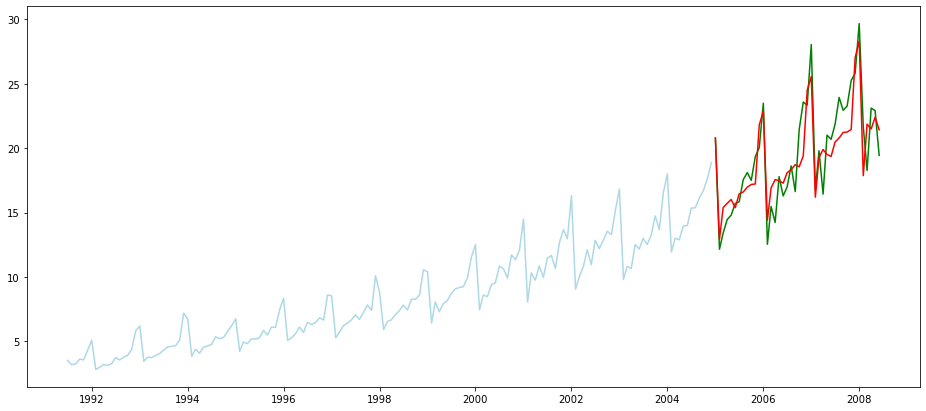

In [7]:
pred = pd.DataFrame(pred)
pred.columns = ["yhat"]
pred.index = x_test.index
pred.head()

plt.figure(figsize=(16, 7))
plt.plot(x_train.index, [math.exp(i)-1 for i in x_train.y], color="lightblue")
plt.plot(x_test.index, x_test.y, color="green")
plt.plot(pred.index, [math.exp(i)-1 for i in pred.values], color="red")
plt.show()

## Residual Plots
- Allows us to see if there is any variation left in the data which is not captured by our model.

Text(0.5, 1.0, 'Actual vs Predicted')

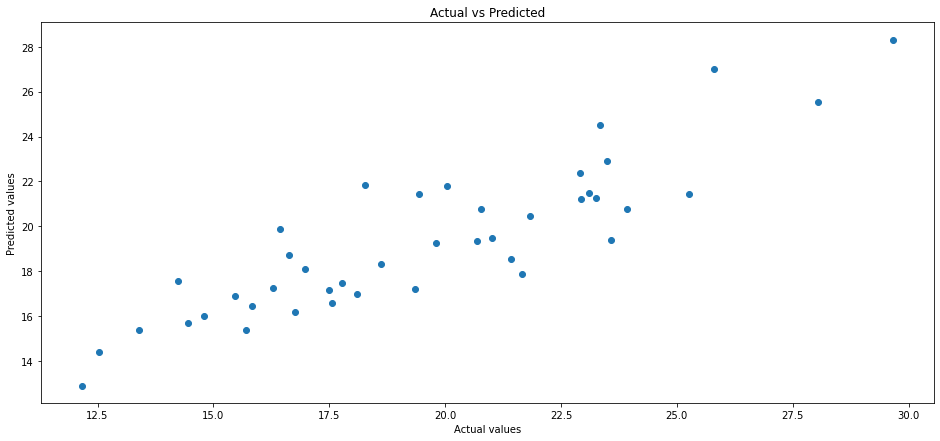

In [8]:
plt.figure(figsize=(16, 7))
plt.scatter(x_test["y"].values, [math.exp(i)-1 for i in pred["yhat"].values])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")

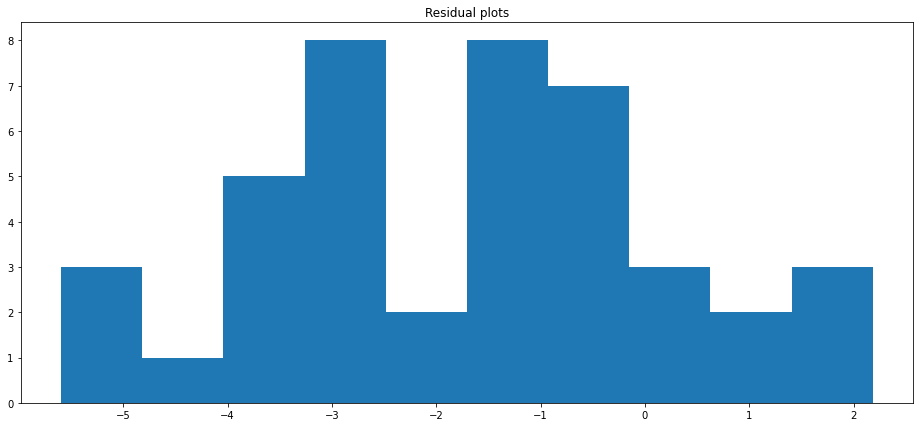

In [9]:
plt.figure(figsize=(16, 7))
plt.hist([j -  math.exp(i)-1 for i, j in zip(pred["yhat"].values, x_test.y)])
plt.title("Residual plots");

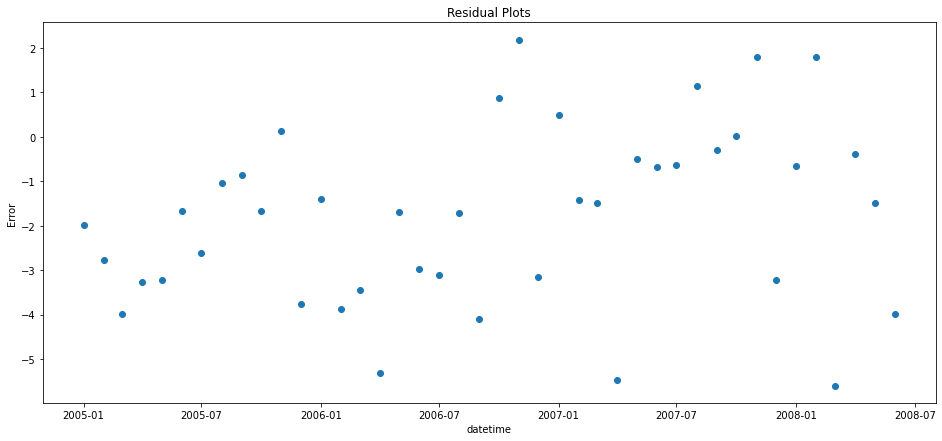

In [10]:
error = [j -  math.exp(i)-1 for i, j in zip(pred["yhat"].values, x_test.y)]
datetime = x_test.index

plt.figure(figsize=(16, 7))
plt.scatter(datetime, error)
plt.xlabel("datetime")
plt.ylabel("Error")
plt.title("Residual Plots");

## Insights:
- The errors are random, have a constant mean and normally distributed.
- Using Simple Linear regression and basic feature engineering we reached an RMSE value of 1.96, which is still high compared to ARIMA models, but unlike arima models, u can easily interpret your results here.
- Careful Feature Engineering and use of complex models will reduce your RMSE value further, but there is a cost and you should choose between complexity vs interpretability. 

## tsFresh. 
- https://arxiv.org/abs/1610.07717
- Automatic extraction of 100's of features, Those features describe basic characteristics of the time series such as the number of peaks, the average or maximal value or more complex features such as the time reversal symmetry statistic.
- this package has a built-in filtering procedure. This filtering procedure evaluates the explaining power and importance of each characteristic for the regression or classification tasks at hand.
- Github Link: https://github.com/blue-yonder/tsfresh

## Prophet
- Prophet is open source software released by Facebook's Core Data Science team. It has both python and R API.
- It is a tool for producing high quality forecasts for time series data that has multiple seasonality with linear or non-linear growth. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers.

- Website: https://facebook.github.io/prophet/
- GitHub: https://github.com/facebook/prophet
- Paper: https://peerj.com/preprints/3190.pdf

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
Load the `multiTimeline.csv` and convert the **Month** column into the datatype **datetime** using `to_datetime()` .
Now rename the **Month** column name as **Date** and set it as the index and drop the extra column called **Date**.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
Plot the trend in the data for the year **2012**

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
Plot the time series for ony diet and gym

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
Plot the rolling average for all the three features using the `.rolling()` method by passing the window size as 12 on the mean of the data with no `NaN` values

<center> <h1> Thank you </h1> </center>